<a href="https://colab.research.google.com/github/dswh/lil_nlp_with_tensorflow/blob/main/01_05_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis - Classifying News Headlines as Sacarstic or not

### Project by Anjolaoluwa (dataprincess)

Day 28 of 110 Days of ML Challenge.



## Download and read the news headlines data

This is a [kaggle dataset](https://www.kaggle.com/rmisra/news-headlines-dataset-for-sarcasm-detection) which is further corrected and then hosted on Google Cloud Storage.

In [3]:
!wget --no-check-certificate \
    https://storage.googleapis.com/wdd-2-node.appspot.com/x1.json \
    -o /tmp/headlines.json

In [4]:
##read the data using the pandas library
import pandas as pd

data = pd.read_json("./x1.json")
data.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


## Segregating the headlines

In [5]:
##create lists to store the headlines and labels
headlines = list(data['headline'])
labels = list(data['is_sarcastic'])

## Set the paramters

In [6]:
vocab_size = 10000
max_length = 120
embedding_dim =16
trunc_type = 'post'
pad_type = 'post'
oov_tok = '<oov>'
training_size = 20000

## Preprocess sentences

In [14]:
train_sentences = headlines[0: training_size]
test_sentences = headlines[training_size: ]

train_labels = labels[0: training_size]
test_labels = labels[training_size: ]

#### Import the APIs

In [8]:
# import the required APIs
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


## Tokenize the data

In [20]:
# set up the tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(headlines)

word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded_sequences = pad_sequences(train_sequences, maxlen=max_length, padding=pad_type, truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded_sequences = pad_sequences(test_sequences, maxlen=max_length, padding=pad_type, truncating=trunc_type)


In [21]:
import numpy as np
train_padded_sequences = np.array(train_padded_sequences)
train_labels = np.array(train_labels)
test_padded_sequences = np.array(test_padded_sequences)
test_labels = np.array(test_labels)

## Define the neural network



In [26]:
import tensorflow as tf
from tensorflow import keras

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 120, 16)           160000    
                                                                 
 global_average_pooling1d_2   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_4 (Dense)             (None, 24)                408       
                                                                 
 dense_5 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [28]:
num_epochs = 30

history = model.fit(train_padded_sequences,
                    train_labels,
                    epochs=num_epochs,
                    validation_data=(test_padded_sequences, test_labels),
                    verbose=2
                    )

Epoch 1/30
625/625 - 4s - loss: 0.6773 - accuracy: 0.5717 - val_loss: 0.6179 - val_accuracy: 0.7771 - 4s/epoch - 6ms/step
Epoch 2/30
625/625 - 2s - loss: 0.4710 - accuracy: 0.8180 - val_loss: 0.3939 - val_accuracy: 0.8333 - 2s/epoch - 4ms/step
Epoch 3/30
625/625 - 3s - loss: 0.3402 - accuracy: 0.8621 - val_loss: 0.3499 - val_accuracy: 0.8511 - 3s/epoch - 5ms/step
Epoch 4/30
625/625 - 3s - loss: 0.2856 - accuracy: 0.8870 - val_loss: 0.3345 - val_accuracy: 0.8542 - 3s/epoch - 4ms/step
Epoch 5/30
625/625 - 2s - loss: 0.2508 - accuracy: 0.9009 - val_loss: 0.3260 - val_accuracy: 0.8596 - 2s/epoch - 4ms/step
Epoch 6/30
625/625 - 2s - loss: 0.2227 - accuracy: 0.9158 - val_loss: 0.3267 - val_accuracy: 0.8605 - 2s/epoch - 4ms/step
Epoch 7/30
625/625 - 3s - loss: 0.2002 - accuracy: 0.9245 - val_loss: 0.3321 - val_accuracy: 0.8591 - 3s/epoch - 4ms/step
Epoch 8/30
625/625 - 3s - loss: 0.1822 - accuracy: 0.9316 - val_loss: 0.3560 - val_accuracy: 0.8486 - 3s/epoch - 5ms/step
Epoch 9/30
625/625 - 3s 

## Visualize the train and validatiion accuracy and *loss*

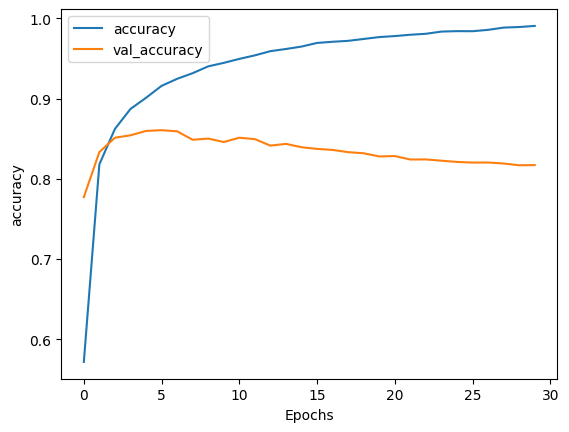

In [32]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.legend([string, 'val_'+string])
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.show

plot_graphs(history, 'accuracy')

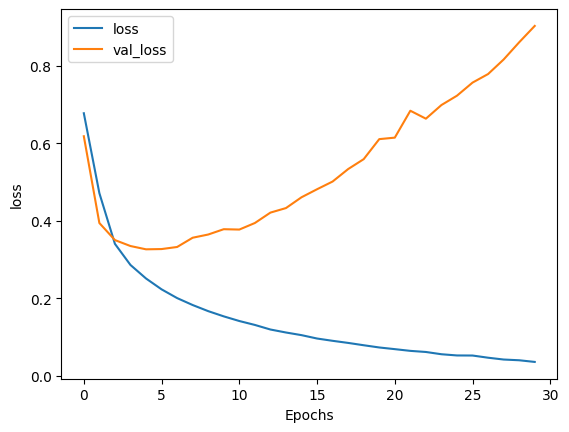

In [33]:
plot_graphs(history, 'loss')

## Classifying a new sentence

In [50]:
new_sentences = []
def predict(new_sentence):

    new_sentences.append(new_sentence)

    # prepare the sequences of the sentences
    new_sequence = tokenizer.texts_to_sequences(new_sentences)
    new_padded_sequence = pad_sequences(new_sequence, maxlen=max_length, padding=pad_type, truncating=trunc_type)

    prediction = model.predict(new_padded_sequence)

    return prediction

In [51]:
predict("World Astonished as New Study Concludes Water is Indeed Wet")

1/1 [==============================] - 0s 20ms/step


array([[0.9995243]], dtype=float32)